## Atmospheric molecular oxygen photolysis
$ O_{2} + h\nu \longrightarrow 2O^{3}P \\
O_{2} + h\nu \longrightarrow 2O^{1}D $

In [8]:
from astropy.io import ascii
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# Reading top-of-atm flux, molecular O2 cross section, quantum yields for photolysis to triplet and singlet oxygen
stellar_flux = ascii.read('/Users/collin/Desktop/projects/Wordsworth/flux data/stellarflux_mean.dat')
# Flux in photons/cm^2/nm/s
o2xs = ascii.read('/Users/collin/Desktop/projects/Wordsworth/flux data/axsO2.dat')
# Cross section in cm^2/molecule
qo2_1 = ascii.read('/Users/collin/Desktop/projects/Wordsworth/flux data/qyO2_1.dat')
qo2_2 = ascii.read('/Users/collin/Desktop/projects/Wordsworth/flux data/qyO2_2.dat')

#### The following four cells serve only to read the data into pandas dataframes for ease of plotting and data manipulation.

In [3]:
# Flux to pandas dataframe
waves_list = np.empty(900)
flux_list = np.empty(900)
for i in range(900):
    waves_list[i] = stellar_flux['col1'][i]
    flux_list[i] = stellar_flux['col2'][i]

flux = pd.DataFrame(columns = ['wavelength', 'flux'])
flux['wavelength'] = waves_list
flux['flux'] = flux_list
flux.describe()

,wavelength,flux
count,900.000000,9.000000e+02
mean,450.500000,2.866204e+14
std,259.951919,2.223390e+14
min,1.000000,2.558300e+06
25%,225.750000,5.388025e+12
50%,450.500000,4.148000e+14
75%,675.250000,4.926675e+14
max,900.000000,5.478200e+14


In [4]:
# Cross section to pandas dataframe
waves_list = np.empty(242)
xs_list = np.empty(242)
for i in range(242):
    waves_list[i] = o2xs['col1'][i]
    xs_list[i] = o2xs['col2'][i]

o2_xs = pd.DataFrame(columns = ['wavelength', 'cross section'])
o2_xs['wavelength'] = waves_list
o2_xs['cross section'] = xs_list
o2_xs.describe()

,wavelength,cross section
count,242.000000,2.420000e+02
mean,121.500000,5.521490e-18
std,70.003571,5.004332e-18
min,1.000000,6.385070e-25
25%,61.250000,1.924063e-20
50%,121.500000,7.226580e-18
75%,181.750000,1.000000e-17
max,242.000000,1.438960e-17


In [5]:
# Quantum yield for triplet oxygen to pandas dataframe
waves_list = np.empty(143)
q_list = np.empty(143)
for i in range(143):
    waves_list[i] = qo2_1['col1'][i]
    q_list[i] = qo2_1['col2'][i]

qo2_triplet = pd.DataFrame(columns = ['wavelength', 'quantum yield'])
qo2_triplet['wavelength'] = waves_list
qo2_triplet['quantum yield'] = q_list
qo2_triplet.describe()

,wavelength,quantum yield
count,143.00000,143.000000
mean,171.00000,0.475524
std,41.42463,0.501156
min,100.00000,0.000000
25%,135.50000,0.000000
50%,171.00000,0.000000
75%,206.50000,1.000000
max,242.00000,1.000000


In [6]:
# Quantum yield for triplet oxygen to pandas dataframe
waves_list = np.empty(143)
q_list = np.empty(143)
for i in range(143):
    waves_list[i] = qo2_2['col1'][i]
    q_list[i] = qo2_2['col2'][i]

qo2_singlet = pd.DataFrame(columns = ['wavelength', 'quantum yield'])
qo2_singlet['wavelength'] = waves_list
qo2_singlet['quantum yield'] = q_list
qo2_singlet.describe()

,wavelength,quantum yield
count,143.00000,143.000000
mean,171.00000,0.524476
std,41.42463,0.501156
min,100.00000,0.000000
25%,135.50000,0.000000
50%,171.00000,1.000000
75%,206.50000,1.000000
max,242.00000,1.000000


#### The quantities affecting photolysis rate above are plotted in the following cells.

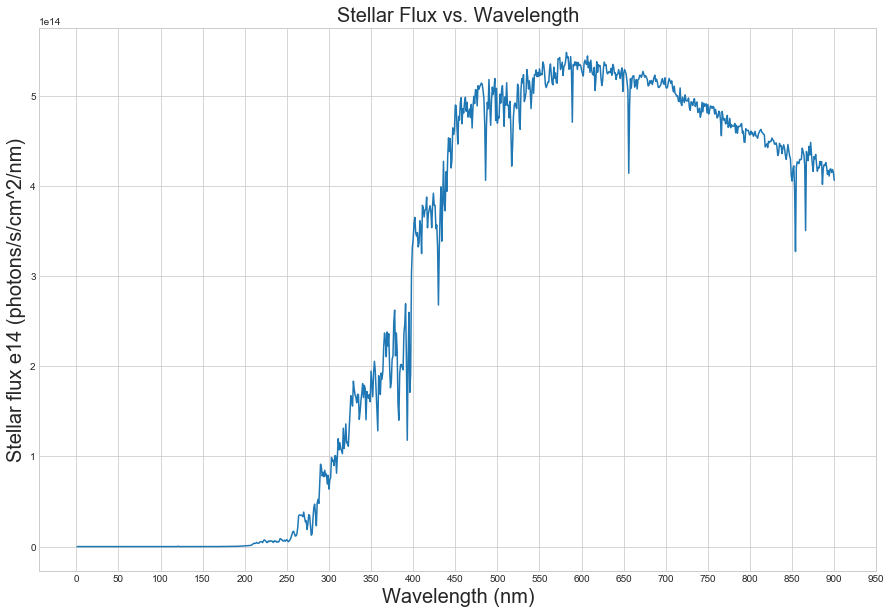

In [62]:
# Stellar flux as a function of wavelength

fig = plt.figure(figsize = (15, 10))
ax = plt.axes()
x = flux['wavelength']
y = flux['flux']
ax.plot(x, y)
ax.set_ylabel("Stellar flux e14 (photons/s/cm^2/nm)", size = 20)
ax.set_xlabel("Wavelength (nm)", size = 20)
ax.set_title("Stellar Flux vs. Wavelength", size = 20)
ax.xaxis.set_ticks(np.arange(0, 1000, 50))

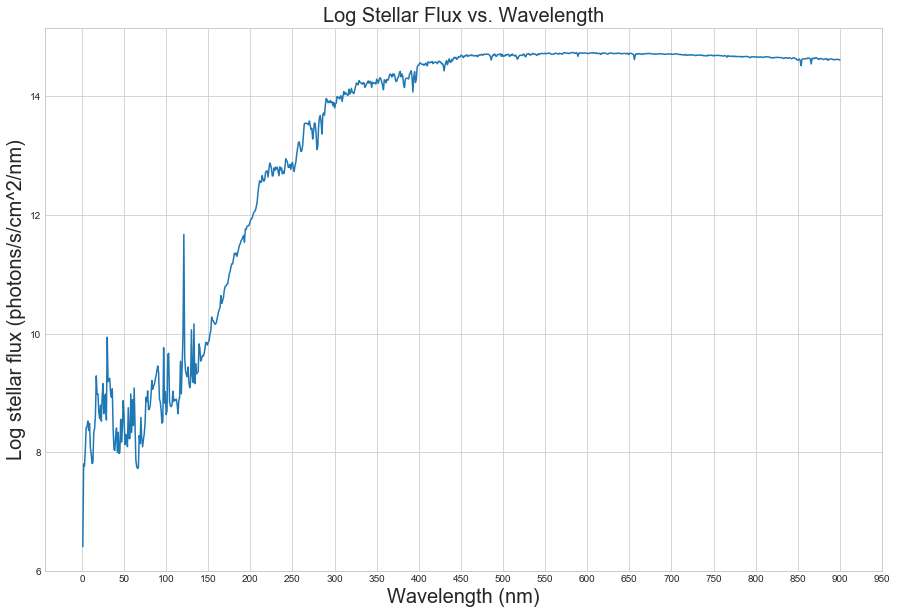

In [64]:
# Stellar flux as a function of wavelength

fig = plt.figure(figsize = (15, 10))
ax = plt.axes()
x = flux['wavelength']
y = flux['flux']
ax.plot(x, np.log10(y))
ax.set_ylabel("Log stellar flux (photons/s/cm^2/nm)", size = 20)
ax.set_xlabel("Wavelength (nm)", size = 20)
ax.set_title("Log Stellar Flux vs. Wavelength", size = 20)
ax.xaxis.set_ticks(np.arange(0, 1000, 50))

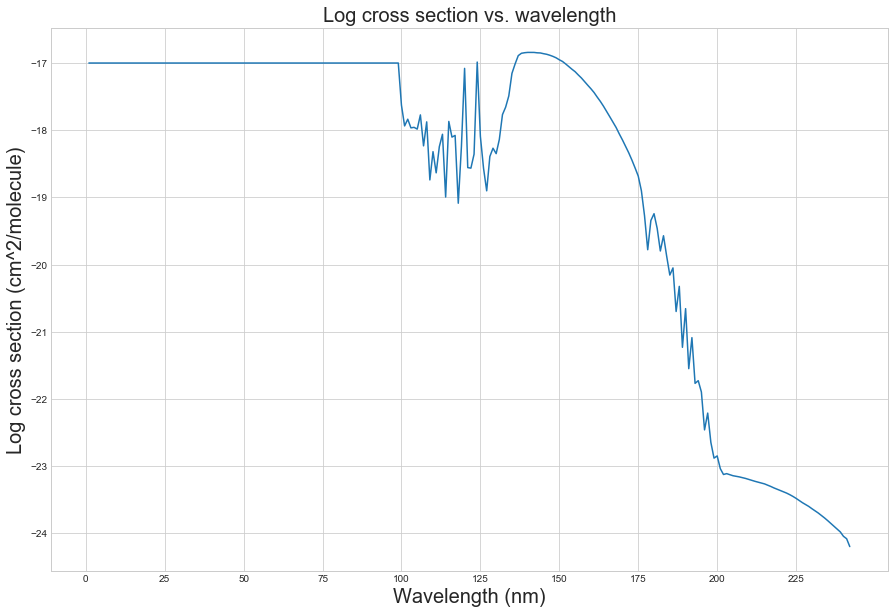

In [59]:
# Absorption cross section as a function of wavelength

fig = plt.figure(figsize = (15, 10))
ax = plt.axes()
x = o2_xs['wavelength']
y = o2_xs['cross section']
ax.plot(x, np.log10(y))
ax.set_ylabel("Log cross section (cm^2/molecule)", size = 20)
ax.set_xlabel("Wavelength (nm)", size = 20)
ax.set_title("Log cross section vs. wavelength", size = 20)
ax.xaxis.set_ticks(np.arange(0, 250, 25))

### Max cross section around 130-140 nm. The data are consistent with O2 bond energy of ~498 kJ/mol, corresponding to wavelength = 240 nm. 

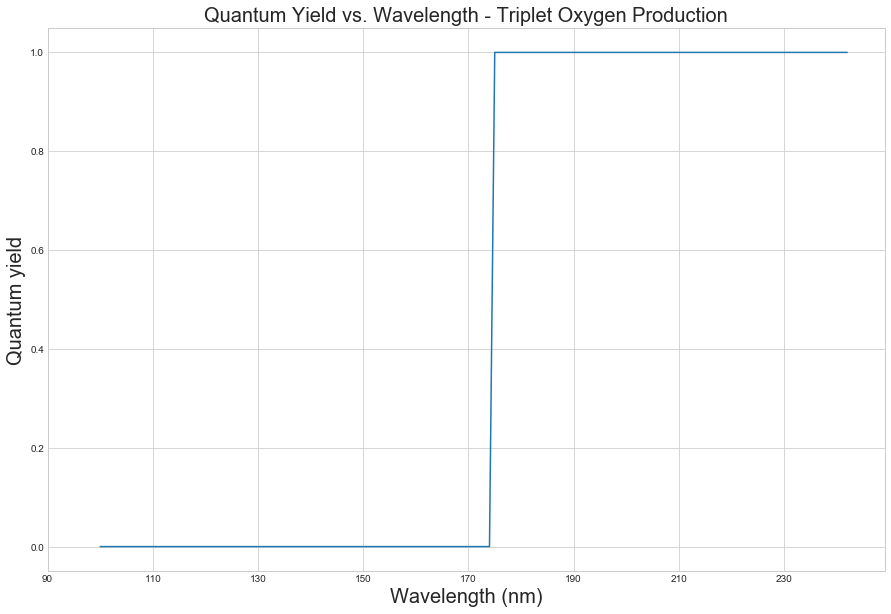

In [71]:
# Quantum yield as a function of wavelength - triplet oxygen

fig = plt.figure(figsize = (15, 10))
ax = plt.axes()
x = qo2_triplet['wavelength']
y = qo2_triplet['quantum yield']
ax.plot(x, y)
ax.set_ylabel("Quantum yield", size = 20)
ax.set_xlabel("Wavelength (nm)", size = 20)
ax.set_title("Quantum Yield vs. Wavelength - Triplet Oxygen Production", size = 20)
ax.xaxis.set_ticks(np.arange(90, 250, 20))

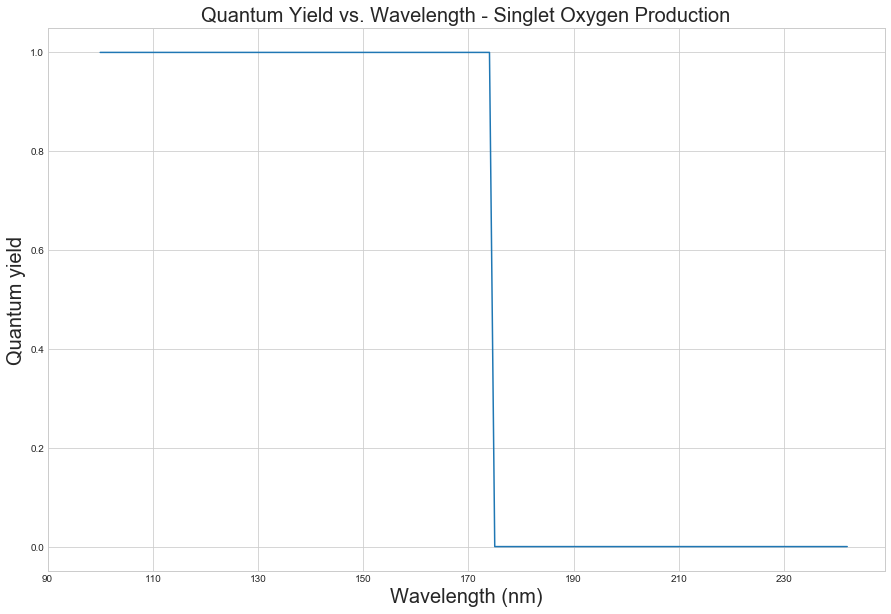

In [72]:
# Quantum yield as a function of wavelength - singlet oxygen

fig = plt.figure(figsize = (15, 10))
ax = plt.axes()
x = qo2_singlet['wavelength']
y = qo2_singlet['quantum yield']
ax.plot(x, y)
ax.set_ylabel("Quantum yield", size = 20)
ax.set_xlabel("Wavelength (nm)", size = 20)
ax.set_title("Quantum Yield vs. Wavelength - Singlet Oxygen Production", size = 20)
ax.xaxis.set_ticks(np.arange(90, 250, 20))

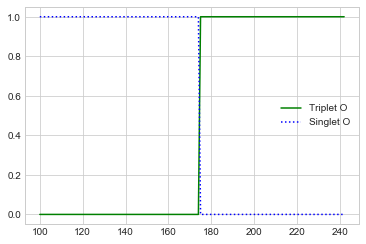

In [81]:
plt.plot(qo2_triplet['wavelength'], qo2_triplet['quantum yield'], '-g', label = 'Triplet O')
plt.plot(qo2_singlet['wavelength'], qo2_singlet['quantum yield'], ':b', label = 'Singlet O')
plt.legend()

#### The change from quantum yield 0 to 1 for triplet oxygen production occurs at 175 nm. The change from quantum yield 1 to 0 also occurs at 175 nm for singlet oxygen production. Singlet oxygen occupies an excited state with an empty p orbital. It follows that higher energy photons are required to produce the excited state species.

#### It's suprising that there are no values between 0 and 1 in the data. This implies that for any given wavelength between 100 nm and 242 nm, there is only either a 100% probability or a 0% probability of photolysis given an absoprtion event.

### Calculating photodissociation rates

[1] $$ Rate = k[O_{2}] = kc_{O2}n_{a}(0) $$

[2] $$k = \int_{\lambda} q_{O2}(\lambda) \sigma_{O2}(\lambda) I_{\lambda}d\lambda$$

[3] $$ Rate = c_{O2}n_{a}(0) \int_{\lambda} q_{O2}(\lambda) \sigma_{O2}(\lambda) I_{\lambda}d\lambda $$

[4] $$ Rate(z) = q \sigma c_{O2} n_{a}(0) I_\infty exp[- \frac{z}{H} - \sigma c_{O2} H n_{a}(z)] $$

In [108]:
import scipy.integrate

In [109]:
# New data frames to store cross section, yield, and flux all in once place
df_rate_triplet = pd.DataFrame(columns = ['wavelength', 'cross section', 'quantum yield', 'flux'])
df_rate_singlet = pd.DataFrame(columns = ['wavelength', 'cross section', 'quantum yield', 'flux'])

df_rate_triplet['wavelength'] = qo2_triplet['wavelength']*1e-9 #convert to meter
df_rate_triplet['cross section'] = list(o2_xs['cross section'].iloc[99:242]/10000) #convert to m^2/molecule
df_rate_triplet['quantum yield'] = qo2_triplet['quantum yield']
df_rate_triplet['flux'] = list(flux['flux'].iloc[99:242]*1e13) #convert to photons/m^3/s

df_rate_singlet['wavelength'] = qo2_singlet['wavelength']*1e-9
df_rate_singlet['cross section'] = list(o2_xs['cross section'].iloc[99:242]/10000)
df_rate_singlet['quantum yield'] = qo2_singlet['quantum yield']
df_rate_singlet['flux'] = list(flux['flux'].iloc[99:242]*1e13)

df_rate_triplet.head()

,wavelength,cross section,quantum yield,flux
0,1.000000e-07,2.365650e-22,0.0,4.290400e+21
1,1.010000e-07,1.159930e-22,0.0,5.007900e+21
2,1.020000e-07,1.459620e-22,0.0,4.432100e+22
3,1.030000e-07,1.085270e-22,0.0,4.633200e+22
4,1.040000e-07,1.104250e-22,0.0,7.115000e+21


In [113]:
# Photodissociation rate for triplet oxygen production

sigma = df_rate_triplet['cross section']
q = df_rate_triplet['quantum yield']
I = df_rate_triplet['flux']

# Rate constant, k, as a function of wavelength, l
k = lambda l:q*sigma*I
i = scipy.integrate.quad(k, 100e-7, 242e-7)
print(i)

TypeError: cannot convert the series to <class 'float'>